# Toxic Release Inventory for Water Analysis
## From Logan Peterson

#### About Dataset:
This dataset presents information about the release of toxic material into the water across Allegheny County. Toxic release into water is the chemicals from various locations that are released into the water and cause damage to humans in that area. Generally, the higher the total release, the more chemicals that are exposed to the environment.

#### Why We Chose This Dataset:
We chose this dataset because our overall goal is to find the healthiest neighborhood in Pittsburgh based on environmental factors, so outside of land and air, another big area of focus is the impact of water on humans. This dataset helps us understand the toxic release of chemicals into the water that people use, so if an area have high toxic release, then those people are exposed to harmful chemicals causing many health problems. This helps us understand what areas have healthier people based on the amount of toxic release.

In [123]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
waterfile = pd.read_csv("TRIWater.csv")
waterfile.head(10)

,_id,TRI_FACILITY_ID,DOC_CTRL_NUM,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,COUNTY_NAME,STATE_COUNTY_FIPS_CODE,STATE_ABBR,ZIP_CODE,...,RELEASE_RANGE_CODE,REL_EST_AMT,RELEASE_NA,RELEASE_BASIS_EST_CODE,TOTAL_RELEASE,WATER_SEQUENCE_NUM,STREAM_NAME,STORM_WATER_NA,STORM_WATER_PERCENT,REACH_CODE
0,64021,15204PRTTSTABOR,1300140000694,PRUETT-SCHAFFER CHEMICAL CO INC.,3327 STAFFORD ST,PITTSBURGH,ALLEGHENY,42003,PA,15204,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
1,64022,15104PCMTL11TAL,1300140029834,EPIC METALS CORP,11 TALBOT AVE,RANKIN,ALLEGHENY,42003,PA,15104,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
2,64023,15104PCMTL11TAL,1300140029846,EPIC METALS CORP,11 TALBOT AVE,RANKIN,ALLEGHENY,42003,PA,15104,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
3,64024,15233ZMMRM2020K,1300140055195,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
4,64025,15233ZMMRM2020K,1300140055207,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
5,64026,15233ZMMRM2020K,1300140055219,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
6,64027,15233ZMMRM2020K,1300140055221,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
7,64028,15233ZMMRM2020K,1300140055233,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
8,64029,15233ZMMRM2020K,1300140055245,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
9,64030,15139TRNGL931TH,1300140060462,GLOBAL CIRCUITS INC.,931 3RD ST,OAKMONT,ALLEGHENY,42003,PA,15139,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN


In [41]:
waterfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15979 entries, 0 to 15978
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          15979 non-null  int64  
 1   TRI_FACILITY_ID              15979 non-null  object 
 2   DOC_CTRL_NUM                 15979 non-null  int64  
 3   FACILITY_NAME                15979 non-null  object 
 4   STREET_ADDRESS               15979 non-null  object 
 5   CITY_NAME                    15979 non-null  object 
 6   COUNTY_NAME                  15979 non-null  object 
 7   STATE_COUNTY_FIPS_CODE       15979 non-null  int64  
 8   STATE_ABBR                   15979 non-null  object 
 9   ZIP_CODE                     15979 non-null  int64  
 10  REGION                       15979 non-null  int64  
 11  FAC_CLOSED_IND               15979 non-null  int64  
 12  ASGN_FEDERAL_IND             15979 non-null  object 
 13  ASGN_AGENCY     

#### What we did so far:
1. We imported the needed libraries
2. We loaded the dataset of use
3. Checked the first 10 values in the data set
4. Then we checked the data type of each category for later use

#### Next Steps:
1. Using the data dictionary we are going to be measuring the total amount of pounds of chemicals each city releases on average into their water.
2. We will also measure the ratio to which the chemicals that are being released contain carginogenic factors.
3. Using these parameters we will be able to see which areas release the least amount as well as the safest releases.
4. This will allow us to determine which areas are the healthiest.

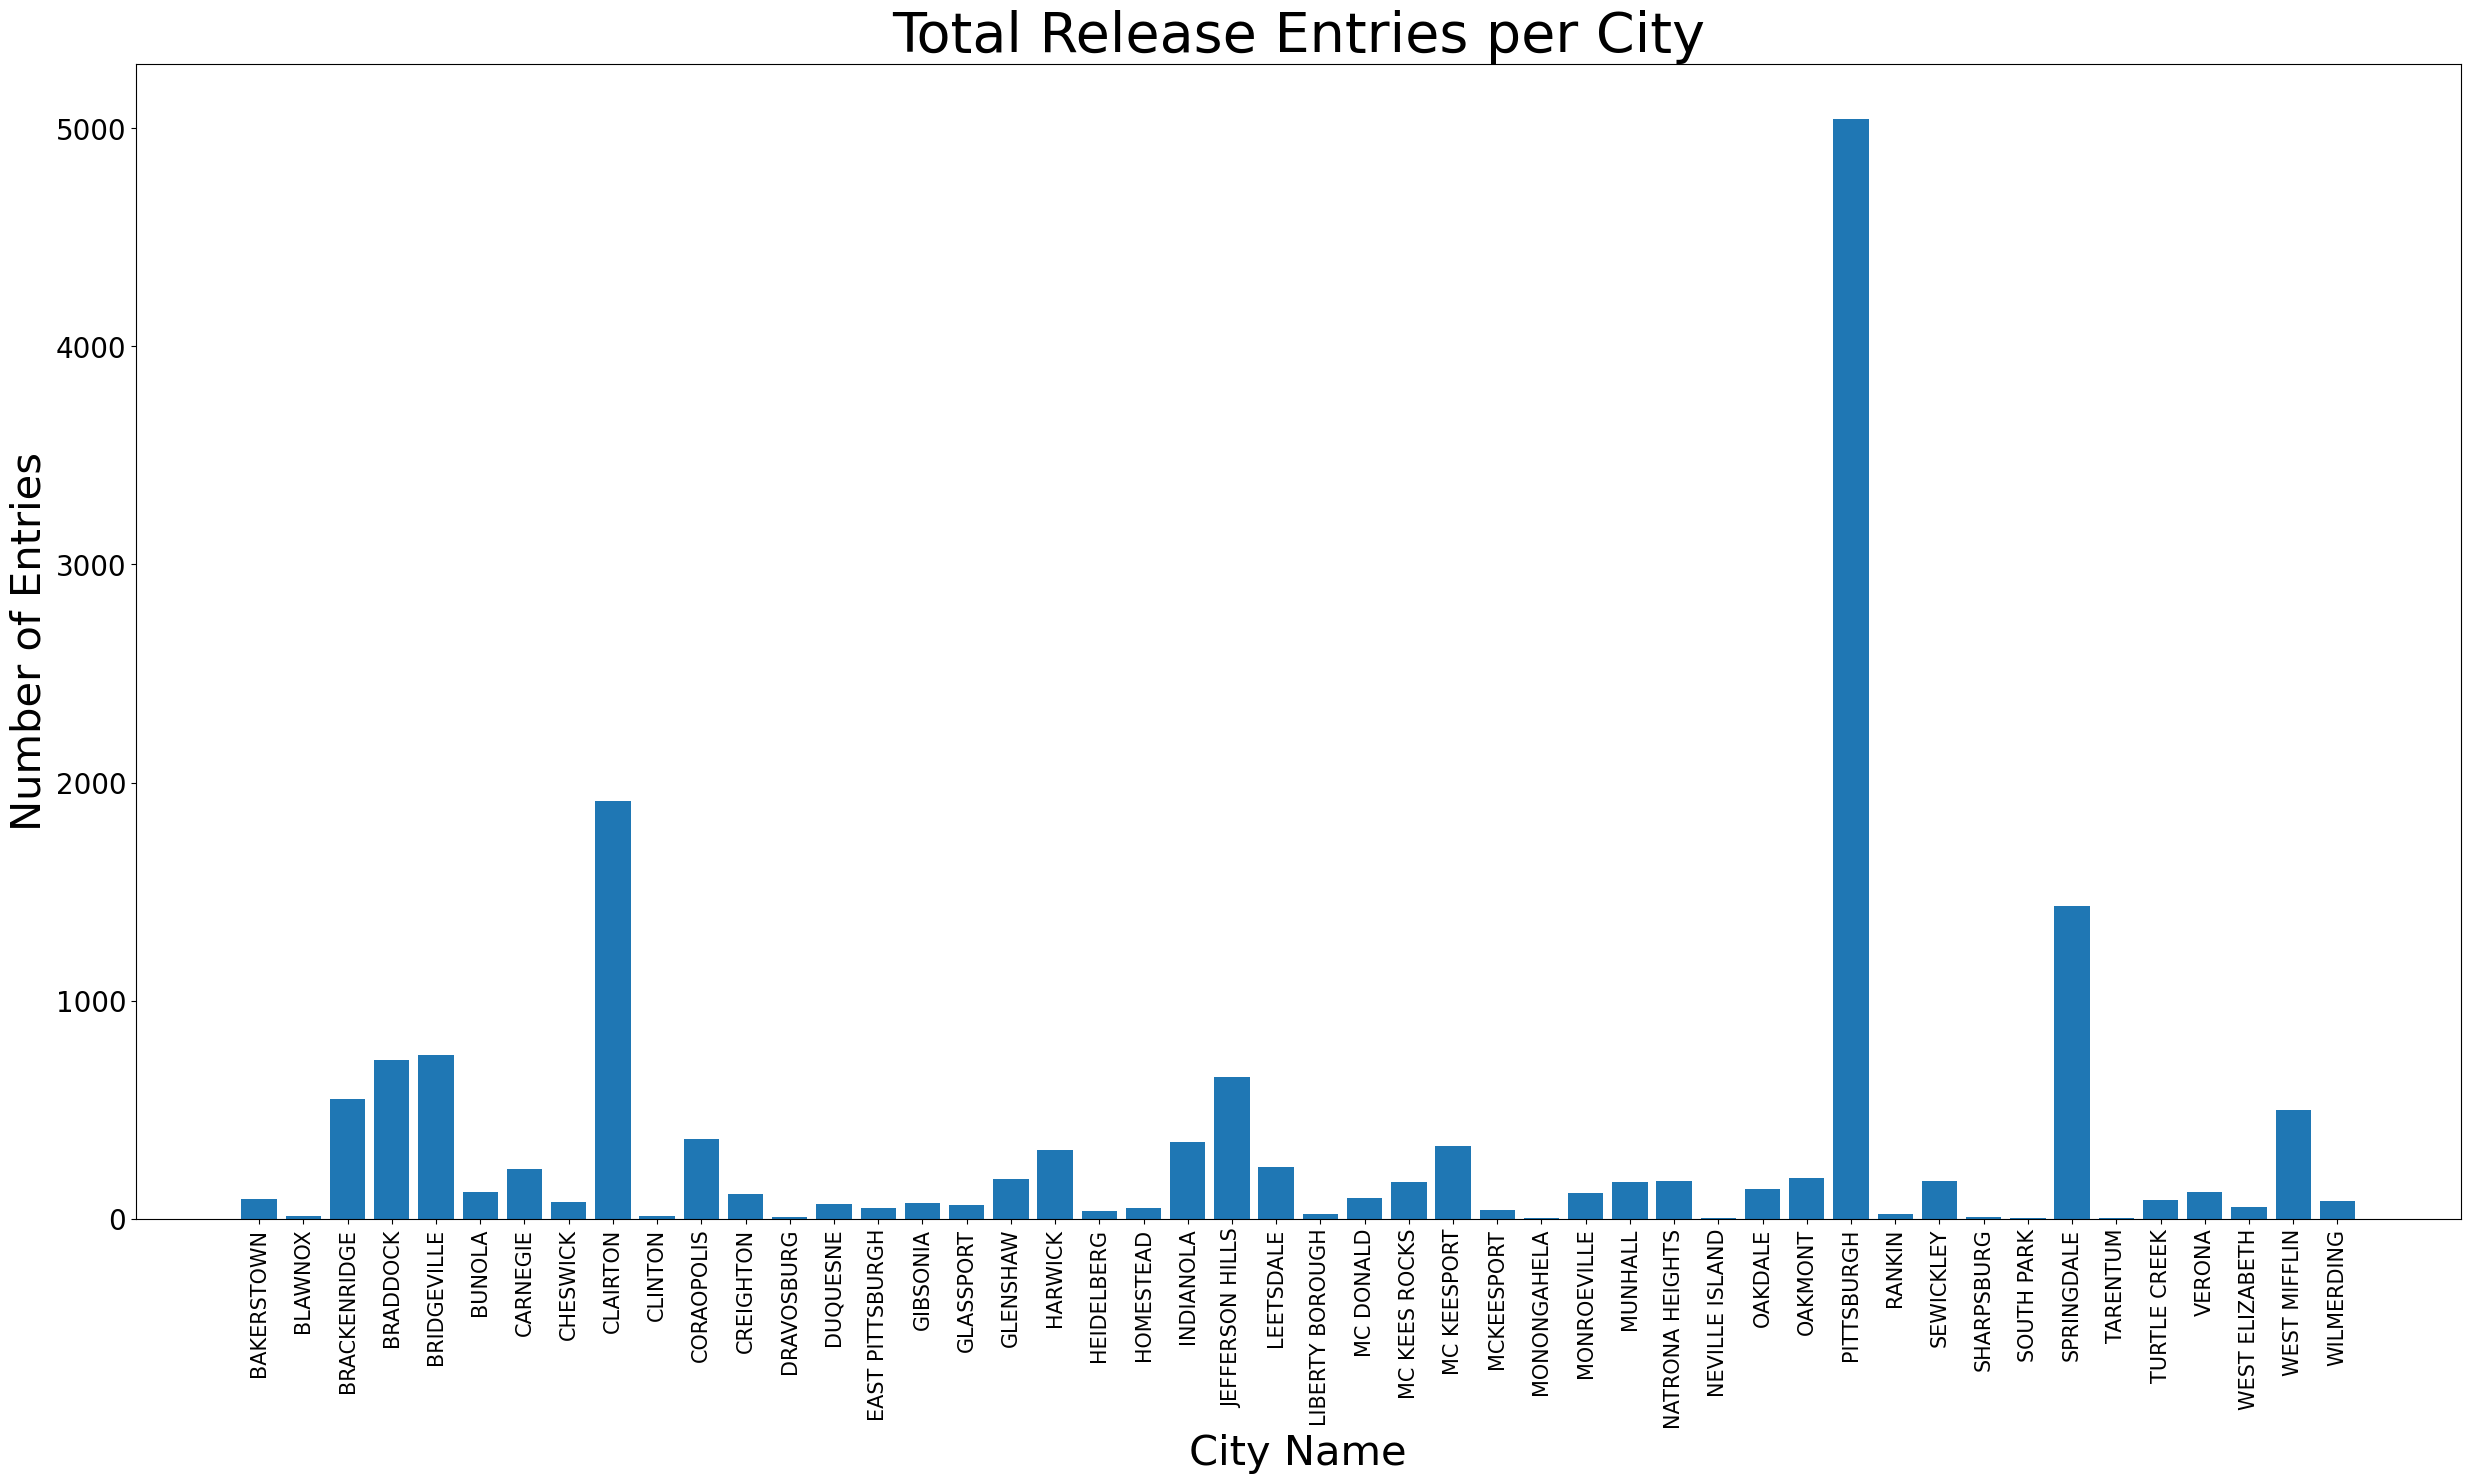

In [111]:
totalcityrelease = waterfile.groupby('CITY_NAME')['TOTAL_RELEASE'].size()

totrel = list(totalcityrelease.values)
totname = list(totalcityrelease.keys())
plt.figure(figsize=(30, 15))
plt.bar(totname, totrel)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=20)
plt.ylabel("Number of Entries", fontsize=30)
plt.xlabel("City Name", fontsize=30)
plt.title("Total Release Entries per City", fontsize=40)
plt.show()

### Summary of Graph:
1. Using this data we are able to see which cities are going to have the most reliable data.
2. As the sample size increases we are able to draw more accurate conclusions from the data.
3. The cities with a reliable amount of data include Brackenridge, Braddock, Bridgeville, Carnegie, Clairton, Corapolis, Glenshaw, Harwick, Indianola, Jefferson Hills, Leetsdale, McKees Rocks, McKeesport, Oakmont, Pittsburgh, Springdale, and West Mifflin.

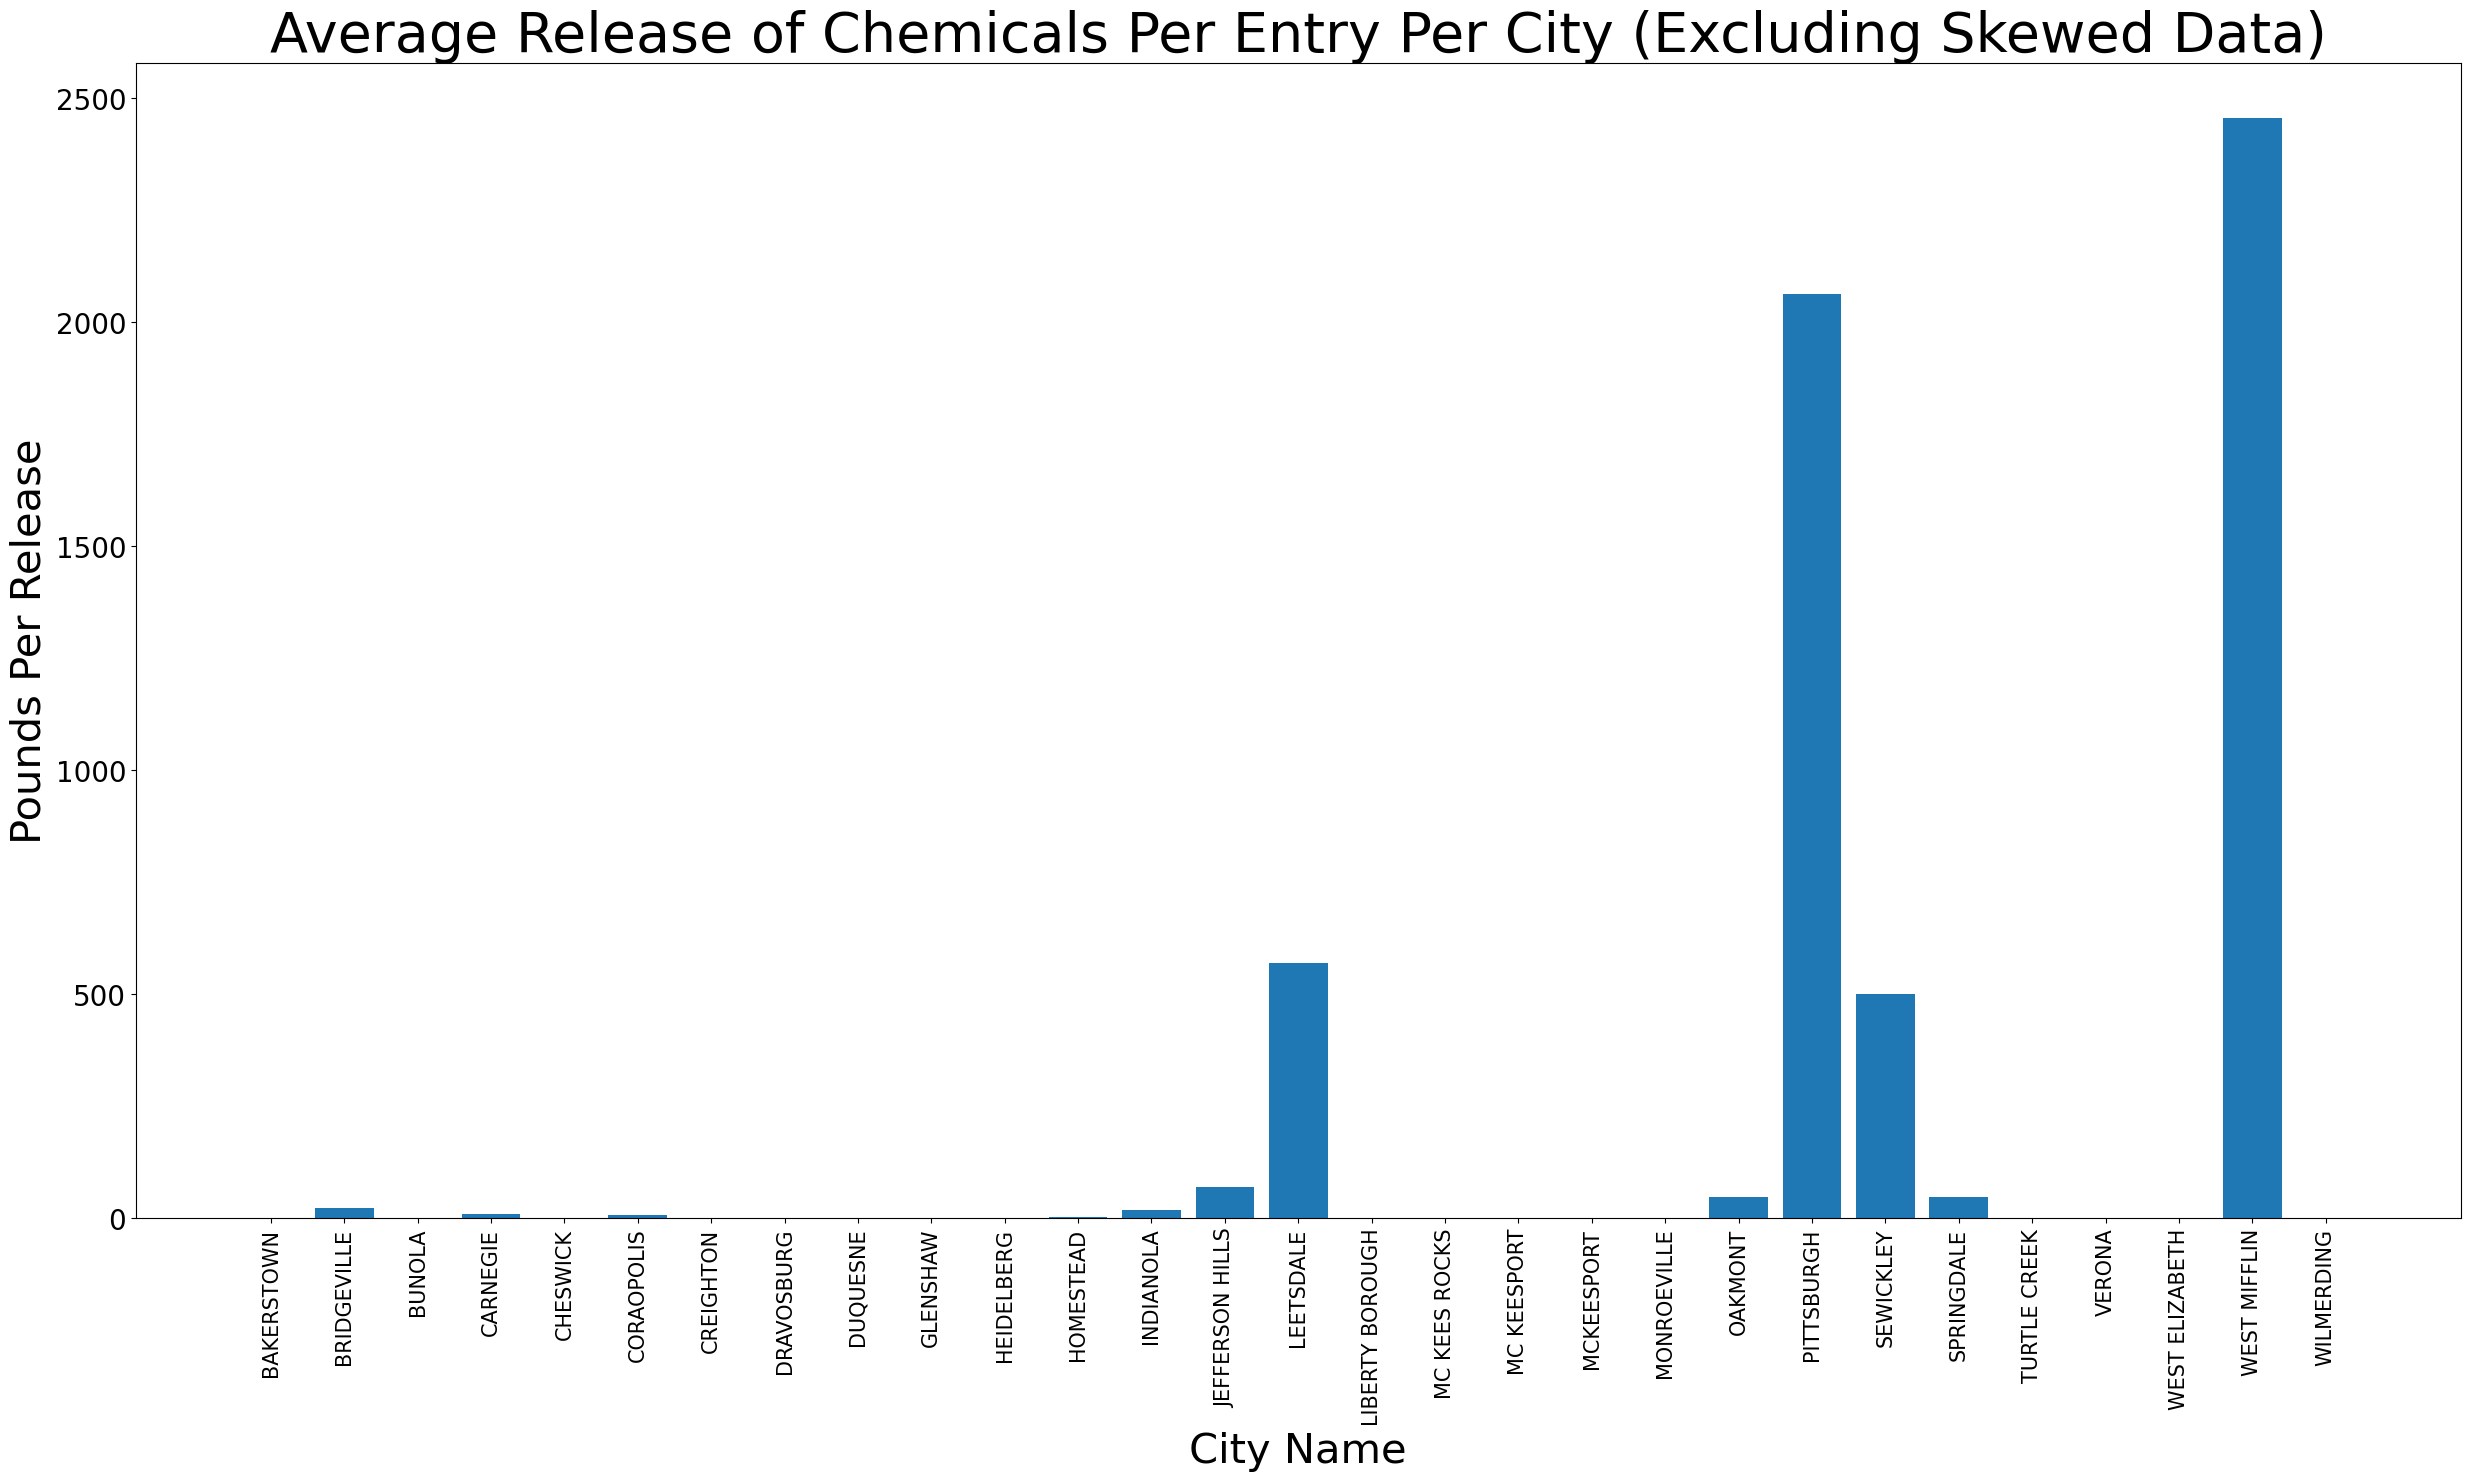

In [119]:
avgcityrelease = waterfile.groupby('CITY_NAME')['TOTAL_RELEASE'].mean()
## print(avgcityrelease)
goodavgcityrelease = avgcityrelease[avgcityrelease < 2500]
## print(goodavgcityrelease)

avgrel = list(goodavgcityrelease.values)
avgname = list(goodavgcityrelease.keys())
plt.figure(figsize=(30, 15))
plt.bar(avgname, avgrel)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=20)
plt.ylabel("Pounds Per Release", fontsize=30)
plt.xlabel("City Name", fontsize=30)
plt.title("Average Release of Chemicals Per Entry Per City (Excluding Skewed Data)", fontsize=40)
plt.show()

### Summary of Graph:
1. This bar chart shows us which cities on average have the lowest amount of chemicals (in pounds) being released per entry.
2. This gives us a good idea of which cities are not releasing such a large amount of chemicals every time they dump chemicals into their water.
3. The cities with the lowest average pounds per release include Bakerstown, Bridgeville, Bunola, Carnegie, Cheswick, Corapolis, Creighton, Dravosburg, Duquesne, Glenshaw, Heidelberg, Homestead, Indianola, Jefferson Hills, Leetsdale, Liberty, Mckeesport, Monroeville, Oakmont,  Springdale, Turtle Creek, Verona, Westelizabeth, and Wilmerding.

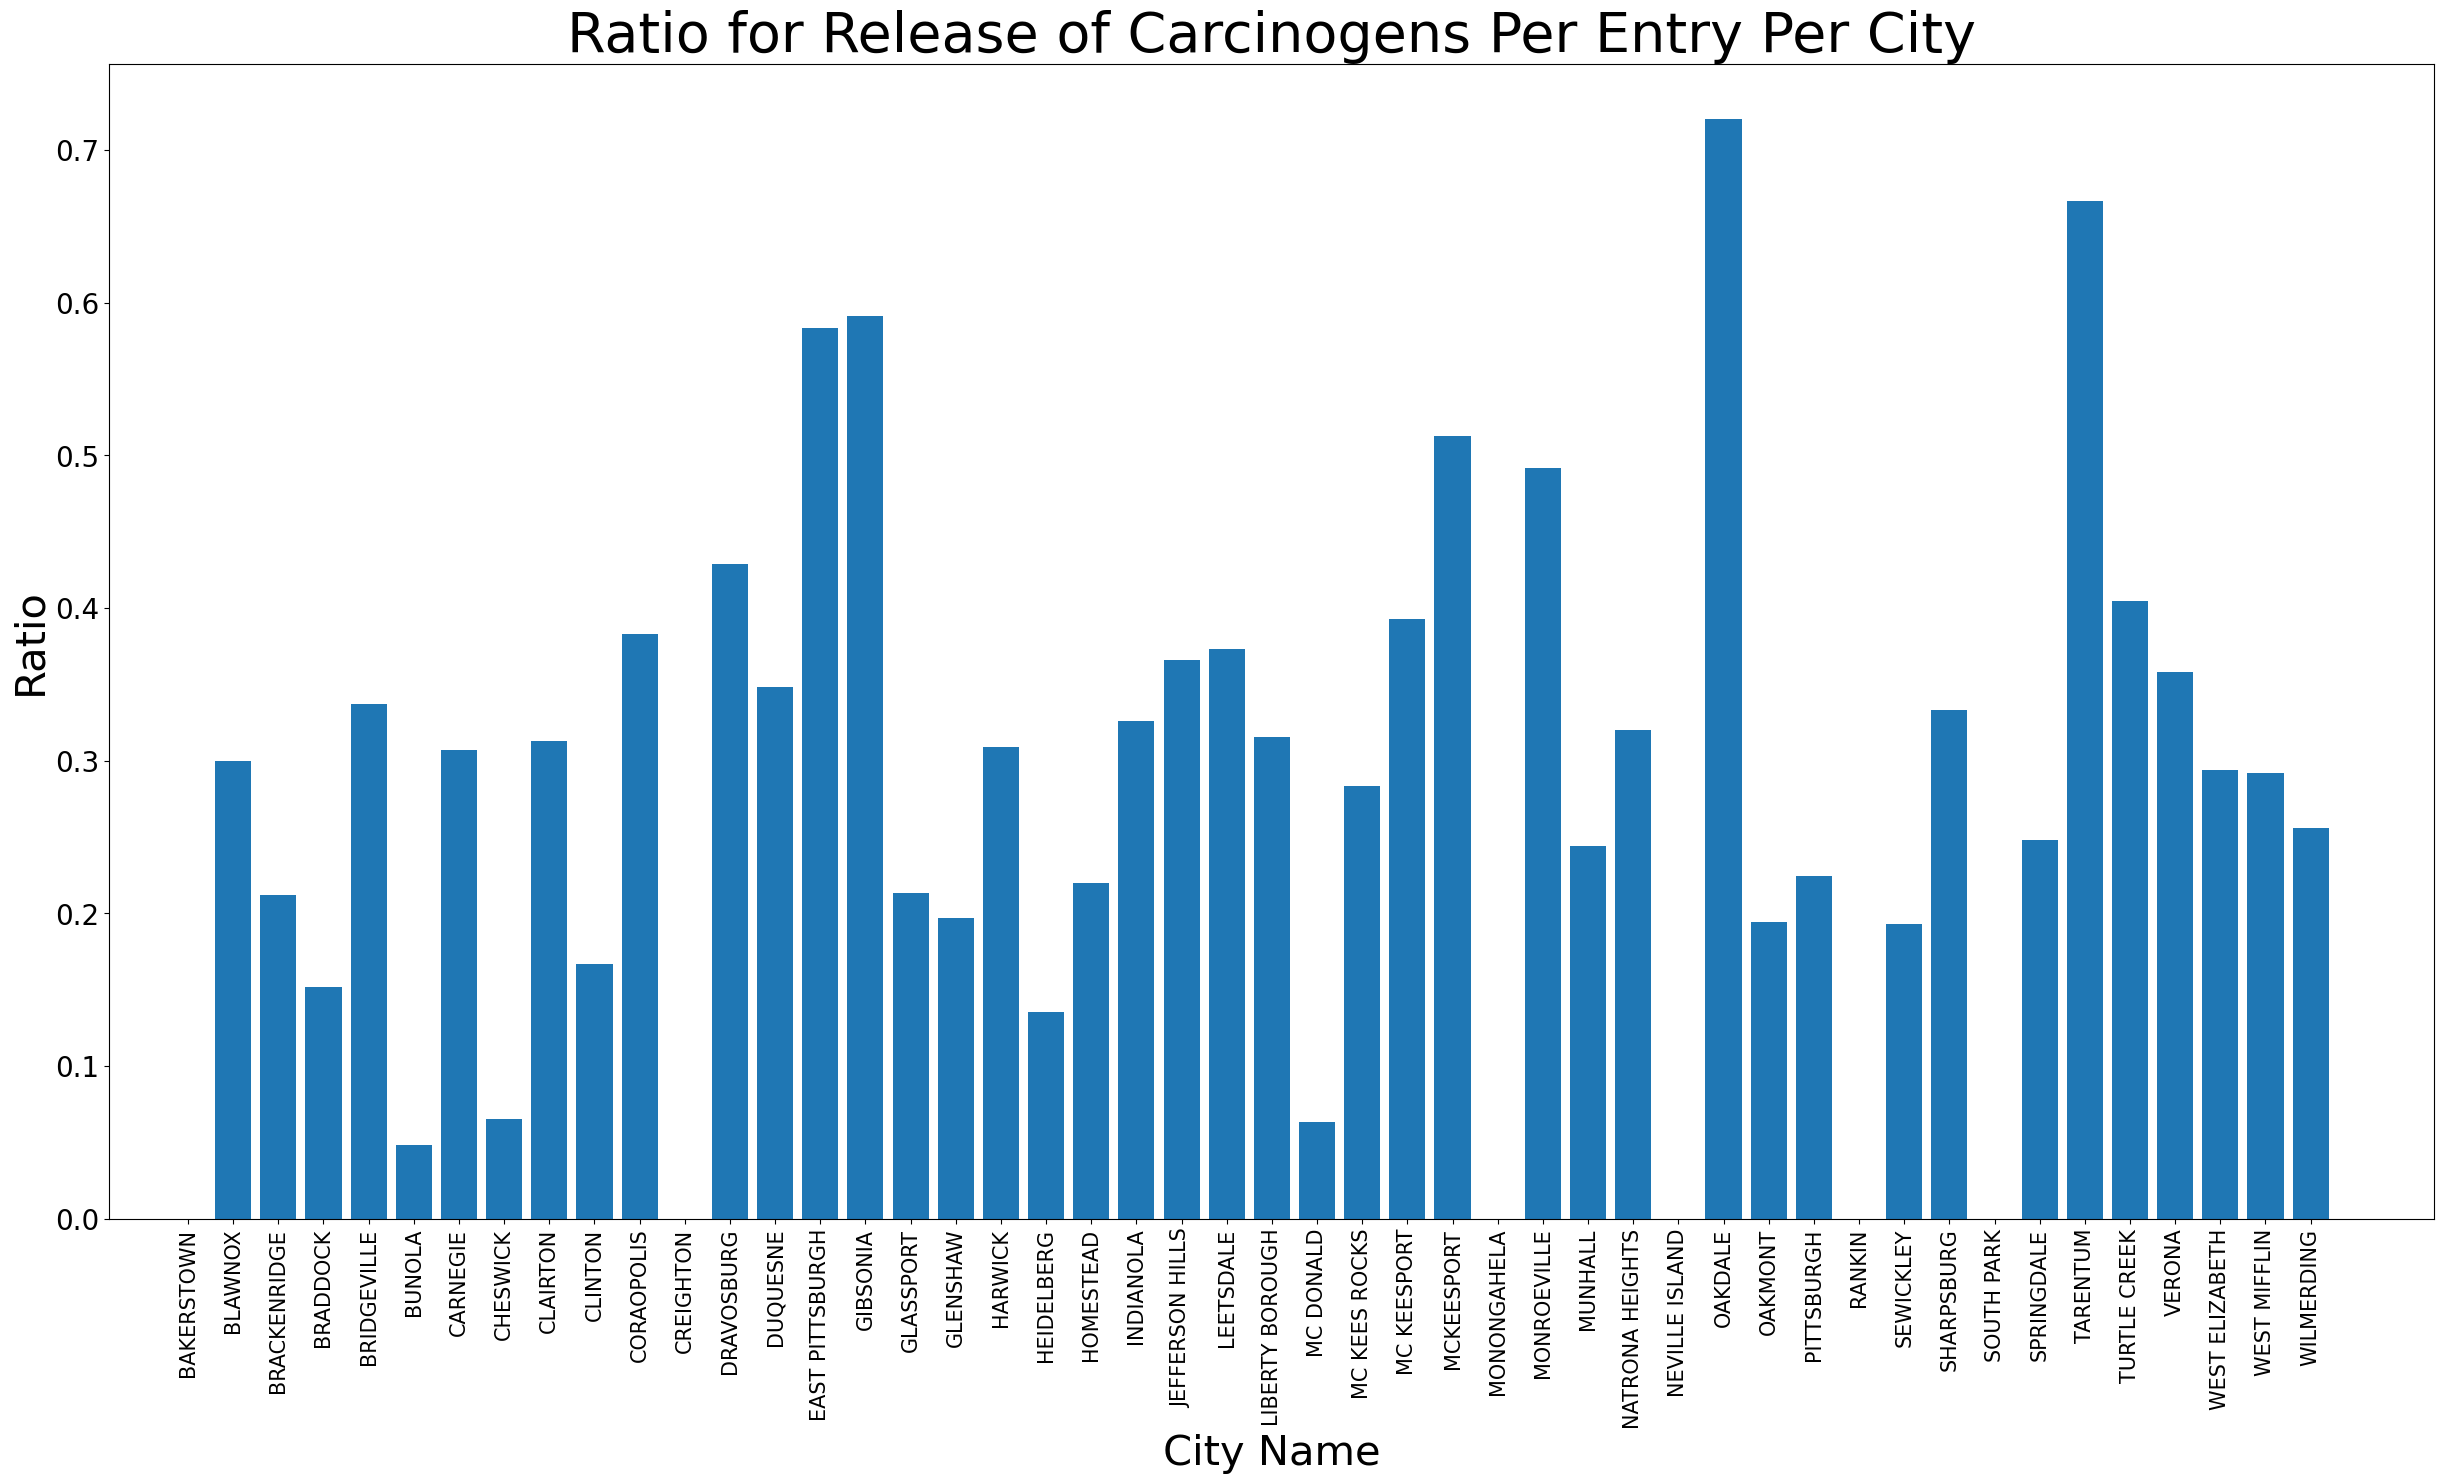

In [122]:
ycarcount = waterfile[waterfile['CARCINOGEN'] == 'Y'].groupby('CITY_NAME').size()
## print(ycarcount)
ncarcount = waterfile[waterfile['CARCINOGEN'] == 'N'].groupby('CITY_NAME').size()
## print(ncarcount)
tcarcount = ycarcount + ncarcount
acarcount = ycarcount / tcarcount
## print(acarcount)

caravg = list(acarcount.values)
carname = list(acarcount.keys())
plt.figure(figsize=(30, 15))
plt.bar(carname, caravg)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=20)
plt.ylabel("Ratio", fontsize=30)
plt.xlabel("City Name", fontsize=30)
plt.title("Ratio for Release of Carcinogens Per Entry Per City", fontsize=40)
plt.show()

### Summary of Graph:
1. Using this data we are able to see the ratio in which an entry from the city has carcinogenic traits.
2. We want to stray away from the cities with higher ratios because that means they are more likely than not to release something with possible cancerous traits.
3. The cities with ratios of under .25 include: Brackenridge, Braddock, Bunola, Cheswick, Clinton, Glassport, Glenshaw, Heidelberg, Homestead, Mc Donald, Munhall, Oakmont, Pittsburgh, Sewickley, and Springdale.

## Best cities from graph 1:
    Brackenridge, Braddock, Bridgeville, Carnegie, Clairton, Corapolis, Glenshaw, Harwick, Indianola, Jefferson Hills, Leetsdale, McKees Rocks, McKeesport, Oakmont, Pittsburgh, Springdale, and West Mifflin.

## Best cities from graph 2:
    Bakerstown, Bridgeville, Bunola, Carnegie, Cheswick, Corapolis, Creighton, Dravosburg, Duquesne, Glenshaw, Heidelberg, Homestead, Indianola, Jefferson Hills, Leetsdale, Liberty, Mckeesport, Monroeville, Oakmont,  Springdale, Turtle Creek, Verona, Westelizabeth, and Wilmerding.

## Best cities from graph 3:
    Brackenridge, Braddock, Bunola, Cheswick, Clinton, Glassport, Glenshaw, Heidelberg, Homestead, Mc Donald, Munhall, Oakmont, Pittsburgh, Sewickley, and Springdale.

## Summary
After looking at the all the graphs, the cities which fit all three categories include:
1. Glenshaw
2. Oakmont
3. Springdale

# Conclusion:
- The goal of using this dataset is to determine which cities in Allegheny County have the healthiest water to make a more broad conclusion as to which neighborhood in Pittsburgh is the healthiest.
- In this study, we analyzed if each city had enough entries to be considered reliable, the average amount of toxic chemicals released in each city, and the ratio of entries with carcinogen release over all entries for each city.
- These different analytical methods helped us conclude that the top three cities with the healthiest water are Glenshaw, Oakmont, and Springdale.
- These citites will now continue as contenders to be the healthiest neighborhood in Pittsburgh after being compared with the other datasets.